In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/第二问/253个变量原始数据.xlsx',encoding='gbk').iloc[:,2:]

In [3]:
data.isnull().sum()[data.isnull().sum()>0] #没有空值

Series([], dtype: int64)

In [4]:
data=data.apply(lambda x:(x-x.mean())/(x.max()-x.mean()))
data.head()

,"硫含量1,μg/g",辛烷值1RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量2,μg/g",辛烷值2RON,"焦炭1,wt%",...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,-0.255763,0.449577,0.051640,-0.106597,0.102696,0.454137,-0.056054,-0.110846,0.391860,-0.095938,...,-0.161689,0.235430,0.027288,0.281708,-0.193927,-0.016486,1.000000,-0.265072,1.000000,0.999858
1,-0.372721,0.399538,-0.035084,0.108904,-0.147987,0.477930,0.380480,-0.110846,0.442539,-0.090364,...,-0.176629,0.234179,0.031956,0.268098,-0.213971,-0.016457,0.989412,-0.463586,0.990028,0.999894
2,-0.323475,0.499615,-0.035084,0.099668,-0.127906,0.468413,0.239354,-0.110846,0.442539,-0.083675,...,-0.223666,0.256463,0.027167,0.262657,-0.221935,-0.016466,0.984516,-0.504664,0.986544,0.999766
3,-0.434278,0.349500,-0.035084,0.076579,-0.077702,0.444619,-0.113461,-0.110846,0.290504,-0.011207,...,-0.166599,0.256750,0.029885,0.248820,-0.241993,-0.016434,0.972654,-0.541647,0.977800,0.999877
4,-0.348098,-0.050808,-0.040412,0.138150,-0.198190,0.444792,-0.111069,-0.110846,-0.064245,-0.081445,...,-0.206622,0.264998,0.028971,0.243224,-0.249932,-0.016375,0.967293,-0.551006,0.974427,1.000000


In [5]:
#找出方差小于0.1的变量
data.std().sort_values()[data.std().sort_values()<0.1]

加热炉氧含量         0.058750
D-101脱水包液位     0.060870
再生器压力          0.071215
再生烟气氧含量        0.075181
污油出装置          0.076172
闭锁料斗烃含量        0.076461
加热炉效率          0.077325
0.19           0.079566
净化风进装置流量       0.080594
D-203底部液位      0.085939
D-201水包界位      0.094142
D-201含硫污水液位    0.094171
空气预热器烟气出口压力    0.094565
D-109压力        0.095604
进料调节阀旁路流量      0.096218
D-124液位        0.098371
dtype: float64

In [6]:
#删除小于0.1的变量
data=data.drop(data.std().sort_values()[data.std().sort_values()<0.1].index,axis=1)

In [7]:
#读取因变量 辛烷值损失
y=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/RON损失(不是变量).xlsx')[::-1].reset_index(drop=True)
y=y.iloc[:,2]

In [8]:
#将相关系数绝对值大于0.8的变量删除 只保留一个
data_copy=data.copy()
corr=abs(data_copy.corr())
for i in data_copy.columns:
    if i in corr.columns:
        index_drop=corr[i].sort_values(ascending=False)[corr[i].sort_values(ascending=False)>0.8].index[1:]
        data_copy=data_copy.drop(index_drop,axis=1)
        corr=abs(data_copy.corr())

In [9]:
data_copy.shape  #剩下164个变量

(325, 164)

In [10]:
#随机森林 特征重要性
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(data_copy,y,test_size=0.3)

In [12]:
 rfreg=RandomForestRegressor(max_depth=3).fit(xtrain,ytrain)

In [13]:
mean_squared_error(ytest,rfreg.predict(xtest))

0.03487690283522122

In [14]:
feature_importtance=pd.concat([pd.DataFrame(data_copy.columns),pd.DataFrame(rfreg.feature_importances_)]
          ,axis=1
         )
feature_importtance.columns=['变量名','重要性']

In [16]:
feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)

,变量名,重要性
0,1.0MPa蒸汽进装置温度,0.068445
1,火炬罐D-206液位,0.046716
2,D-110底流化N2流量,0.044104
3,稳定塔顶压力,0.041977
4,燃料气进装置流量,0.041250
...,...,...
159,再生冷氮气流量,0.000000
160,D121液面,0.000000
161,ME-105过滤器压差,0.000000
162,加热炉进口温度,0.000000


In [17]:
feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True).to_excel('随机森林选取的特征重要性排序.xlsx',index=None)

In [115]:
# a=[]
# b=feature_importtance['重要性'].sort_values(ascending=False)[feature_importtance['重要性'].sort_values(ascending=False)>0].index
# for i in b:
#     a.append(feature_importtance['变量名'][i])

In [135]:
#feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)['重要性'].cumsum()[:45]

In [239]:
#前67个变量累计特征重要性大于90%
selected_features=feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)[:67]['变量名']

In [240]:
#feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)['重要性'].cumsum()[:67]
selected_features

0      1.0MPa蒸汽进装置温度
1         火炬罐D-206液位
2       D-110底流化N2流量
3             稳定塔顶压力
4           燃料气进装置流量
           ...      
62           蒸汽进装置压力
63           加热炉炉膛压力
64      D-203顶部出口管温度
65    再生器顶部/再生器接收器差压
66    S_ZORB AT-0001
Name: 变量名, Length: 67, dtype: object

In [314]:
selected_features=list(selected_features)
#去除非操作变量
for i in data_copy.columns[:9]:
    if i in selected_features:
        selected_features.remove(i)

In [330]:
test_score=[]
selected=[]
for i in selected_features:
    #判断是否是第一个
    if len(test_score)==0:
        selected.append(i)
        xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected],y,random_state=0)
        rfreg=RandomForestRegressor().fit(xtrain,ytrain)
        test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))
        continue
    selected.append(i)
    xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected],y,random_state=0)
    rfreg=RandomForestRegressor().fit(xtrain,ytrain)
    test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(test_score[-1]==mean_squared_error(ytest,rfreg.predict(xtest)))
    if mean_squared_error(ytest,rfreg.predict(xtest))>test_score[-2]:
        selected.remove(i)
        test_score.remove(test_score[-1])
    #print(len(selected))

In [331]:
selected

['1.0MPa蒸汽进装置温度',
 '火炬罐D-206液位',
 '稳定塔顶压力',
 '原料换热器管程总管进口温度',
 '蒸汽进装置流量',
 '加氢裂化轻石脑油进装置流量',
 'S_ZORB AT-0012',
 '氮气进装置流量',
 'K101机出口压力',
 '循环水进装置流量']

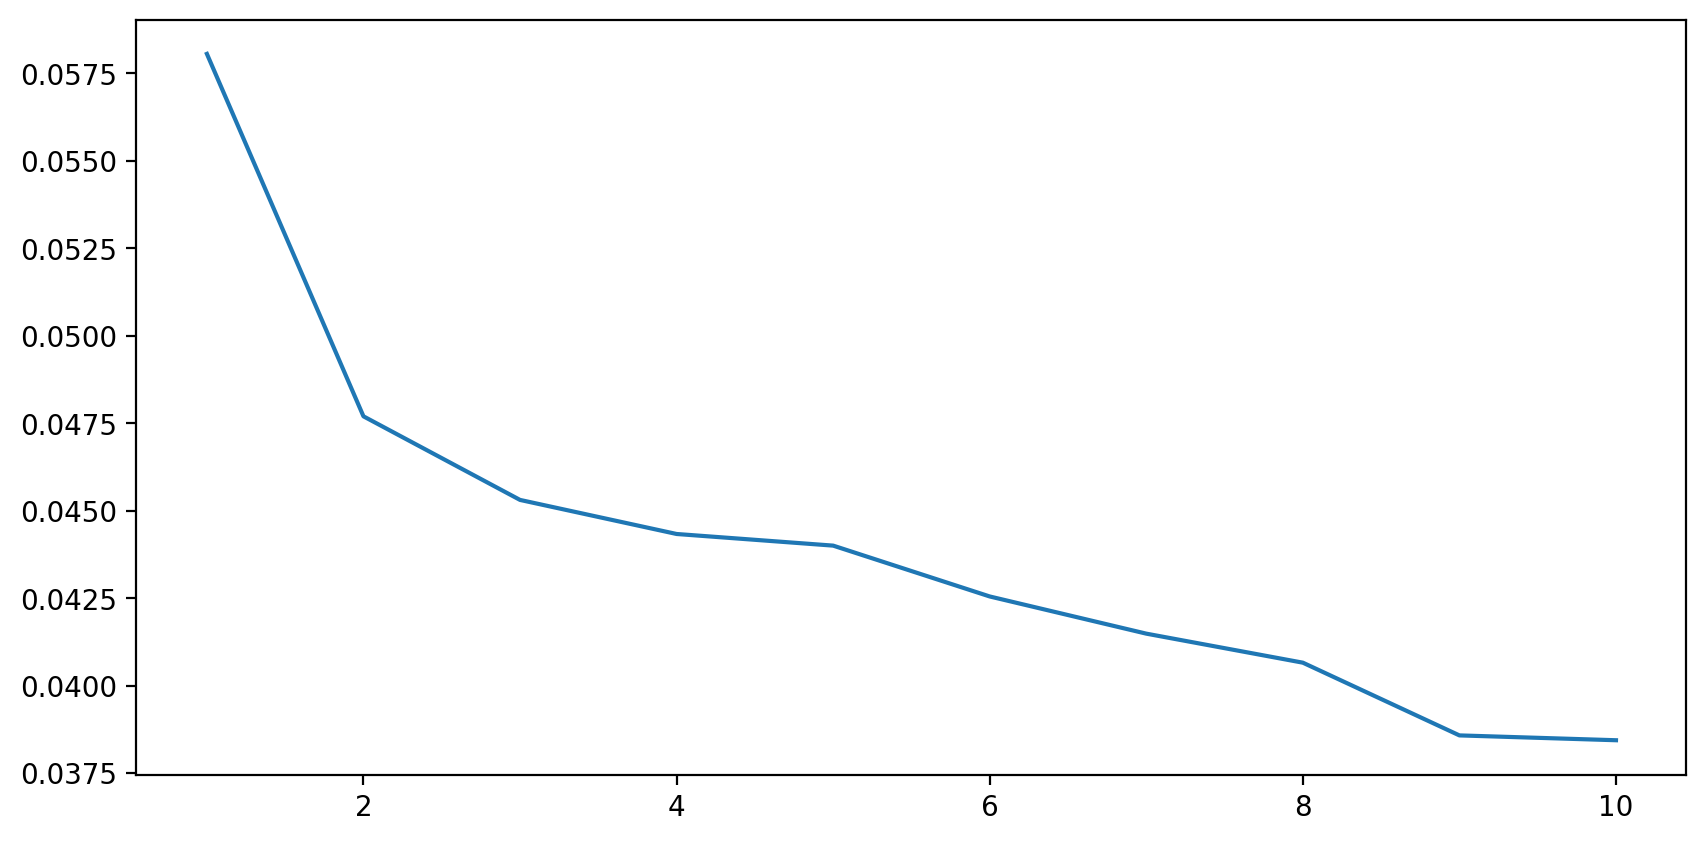

In [349]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,len(selected)+1),test_score)
plt.savefig('第一次逐步变量选择过程中测试集均方误差的变化.png')

In [333]:
min(test_score)

0.03843571012195092

In [334]:
len(selected)

10

In [335]:
b=data_copy[['1.0MPa蒸汽进装置温度',
 '火炬罐D-206液位',
 '稳定塔顶压力',
 '原料换热器管程总管进口温度',
 '蒸汽进装置流量',
 '加氢裂化轻石脑油进装置流量',
 'S_ZORB AT-0012',
 '氮气进装置流量',
 'K101机出口压力',
 '循环水进装置流量']]

In [336]:
h=RandomForestRegressor().fit(b,y).feature_importances_

In [338]:
h

array([0.14001989, 0.09641824, 0.11416334, 0.14275274, 0.07902303,
       0.06565899, 0.08381262, 0.12392787, 0.09725965, 0.05696362])

In [339]:
max(h)

0.1427527368759683

In [340]:
feature_importtance2=pd.concat([pd.DataFrame(b.columns),pd.DataFrame(h)]
          ,axis=1
         )
feature_importtance2.columns=['变量名','重要性']

In [342]:
#feature_importtance2.to_excel('第二轮特征重要性.xlsx')

In [377]:
feature_importtance2.sort_values(by='重要性',ascending=False)['变量名']
test_score2=[]
selected2=[]
for i in feature_importtance2.sort_values(by='重要性',ascending=False)['变量名']:
    #判断是否是第一个
    if len(test_score2)==0:
        selected2.append(i)
        xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected2],y,random_state=0)
        rfreg=RandomForestRegressor().fit(xtrain,ytrain)
        test_score2.append(mean_squared_error(ytest,rfreg.predict(xtest)))
        continue
    selected2.append(i)
    xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected2],y,random_state=0)
    rfreg=RandomForestRegressor().fit(xtrain,ytrain)
    test_score2.append(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(test_score[-1]==mean_squared_error(ytest,rfreg.predict(xtest)))
    if mean_squared_error(ytest,rfreg.predict(xtest))>test_score2[-2]:
        selected2.remove(i)
        test_score2.remove(test_score2[-1])
    #print(len(selected))

In [378]:
selected2

['原料换热器管程总管进口温度',
 '1.0MPa蒸汽进装置温度',
 '氮气进装置流量',
 'K101机出口压力',
 '蒸汽进装置流量',
 '加氢裂化轻石脑油进装置流量']

In [379]:
test_score2

[0.06891689231707279,
 0.04551341487804886,
 0.0419329499999998,
 0.03877760243902427,
 0.038141121585365596,
 0.03744002402438994]

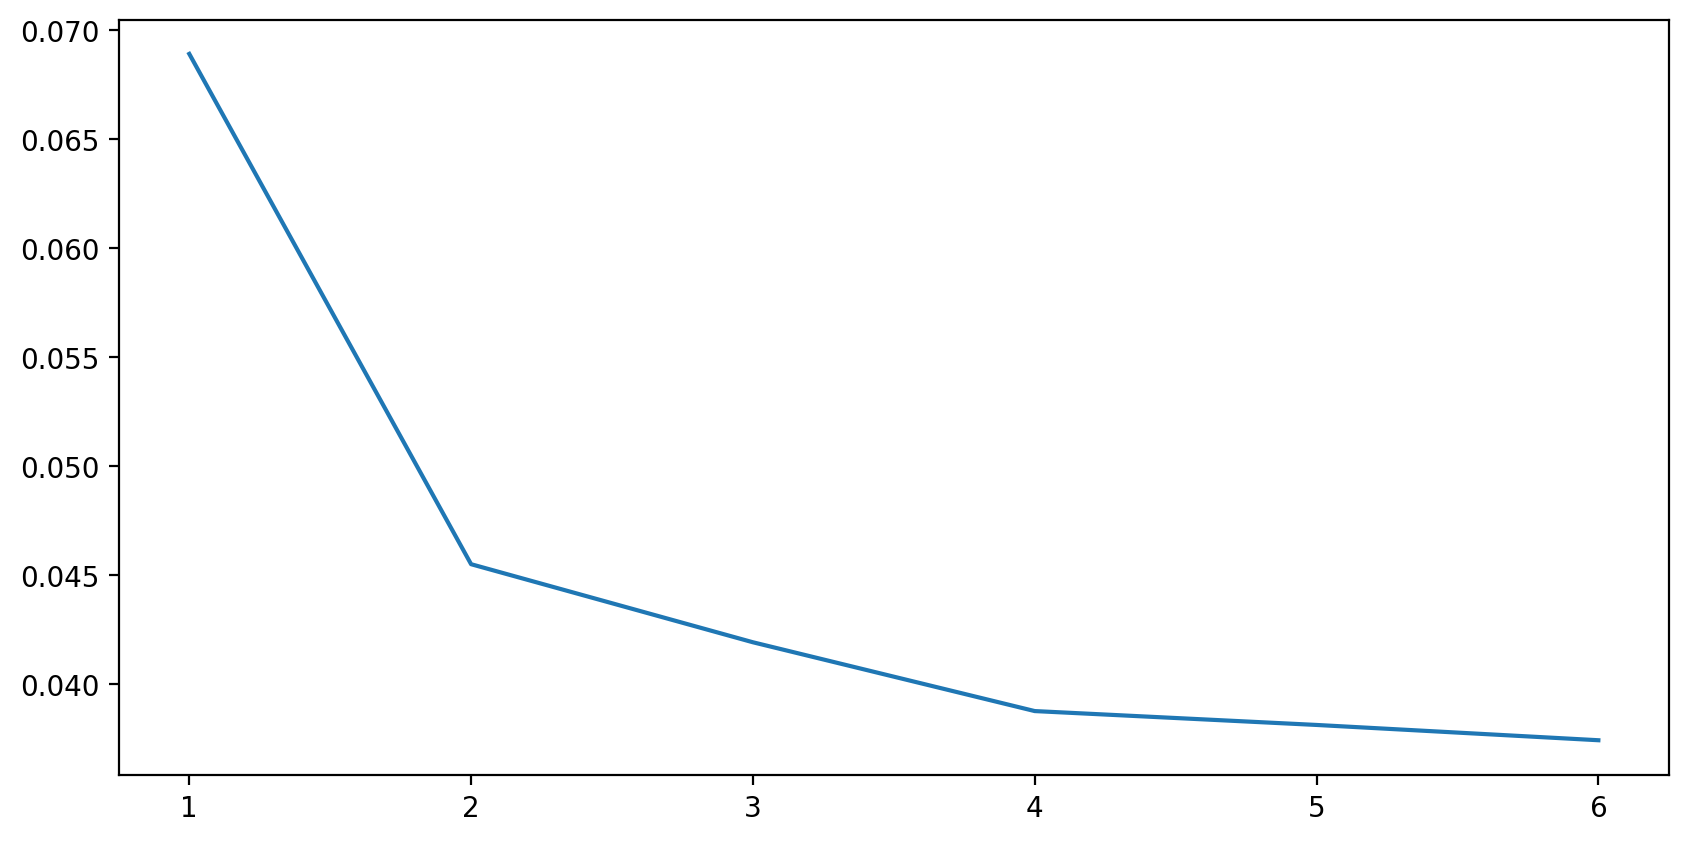

In [380]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,len(selected2)+1),test_score2)
plt.savefig('第二次逐步变量选择过程中测试集均方误差的变化.png')

In [388]:
selected2

['原料换热器管程总管进口温度',
 '1.0MPa蒸汽进装置温度',
 '氮气进装置流量',
 'K101机出口压力',
 '蒸汽进装置流量',
 '加氢裂化轻石脑油进装置流量',
 '辛烷值1RON',
 '硫含量2,μg/g']

In [384]:
selected2.append(data.columns[1])
selected2.append(data.columns[7])

8

In [368]:
pd.read_excel(r'/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/第二问/253个变量原始数据.xlsx',encoding='gbk').iloc[:,2:][selected2]

In [370]:
final